housing.project

# Problem Statement:
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file 
below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:

• Which variables are important to predict the price of variable?

• How do these variables describe the price of the house?

# Business Goal:
You are required to model the price of houses with the available independent variables. This model will then be used 
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the 
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the 
management to understand the pricing dynamics of a new market.



# Technical Requirements:

• Data contains 1460 entries each having 81 variables.

• Data contains Null values. You need to treat them using the domain knowledge and your own understanding.

• Extensive EDA has to be performed to gain relationships of important variable and price.

• Data contains numerical as well as categorical variable. You need to handle them accordingly.

• You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper 
    Parameters. 

• You need to find important features which affect the price positively or negatively.

• Two datasets are being provided to you (test.csv, train.csv). You will train on train.csv dataset and predict on 
    test.csv file.

The “Data file.csv” and “Data description.txt” are enclosed with this file

# Importing necessary libraries

In [1]:
#Importing the important packages  and libraries of the python.

import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# import data set train & test

In [2]:
df_train = pd.read_csv("train.csv")
df_train


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2007        WD         Normal     128000  
1        10   2007        WD         Normal     268000  
2         6   2007        WD         Normal     269790  
3         1   2010       COD         Normal     190000  
4         6   2009        WD         Normal     215000  
...     ...    ...       ...            ...        ...  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[1168 rows x 81 columns]

So here we can see The training dataset, contains the details of Houses.This dataset is comprised of 1168 rows and 81 columns including one target varibale i.e. 'SalePrice'. where we need to predict sales price of house.

In [3]:
df_test = pd.read_csv("test.csv")
df_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
..    ...         ...      ...          ...      ...    ...   ...      ...   
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0           HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3           Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
..          ...       ...  ...         ...      ...    ...   ...         ...   
287         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
288         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
289         Lvl    AllPub  ...           0        0    NaN   NaN        Shed   
290         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
291         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

    MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         0      7    2007        WD         Normal  
1         0      8    2009       COD        Abnorml  
2         0      6    2009        WD         Normal  
3         0      7    2009        WD         Normal  
4         0      1    2008        WD         Normal  
..      ...    ...     ...       ...            ...  
287       0     10    2008        WD         Normal  
288       0      2    2008        WD         Normal  
289     700      3    2010        WD         Normal  
290       0     10    2006        WD         Normal  
291       0      6    2006        WD         Normal  

[292 rows x 80 columns]

So here we can see The Test dataset contains the details Houses.This dataset is comprised of 292 rows and 80 columns.
lets concatinate the train and test data. so that we can do data preprocessing.

# Exploratory Data Analysis (EDA)

In [4]:
#lets add source column to train and test dataset
df_train["source"] = "train"
df_test["source"] = "test"

#lets combine both the datasets
df = pd.concat([df_train,df_test],ignore_index=True)
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0      127         120       RL          NaN     4928   Pave   NaN      IR1   
1      889          20       RL         95.0    15865   Pave   NaN      IR1   
2      793          60       RL         92.0     9920   Pave   NaN      IR1   
3      110          20       RL        105.0    11751   Pave   NaN      IR1   
4      422          20       RL          NaN    16635   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455    83          20       RL         78.0    10206   Pave   NaN      Reg   
1456  1048          20       RL         57.0     9245   Pave   NaN      IR2   
1457    17          20       RL          NaN    11241   Pave   NaN      IR1   
1458   523          50       RM         50.0     5000   Pave   NaN      Reg   
1459  1379         160       RM         21.0     1953   Pave   NaN      Reg   

     LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold  \
0            Lvl    AllPub  ...    NaN    NaN         NaN       0      2   
1            Lvl    AllPub  ...    NaN    NaN         NaN       0     10   
2            Lvl    AllPub  ...    NaN    NaN         NaN       0      6   
3            Lvl    AllPub  ...    NaN  MnPrv         NaN       0      1   
4            Lvl    AllPub  ...    NaN    NaN         NaN       0      6   
...          ...       ...  ...    ...    ...         ...     ...    ...   
1455         Lvl    AllPub  ...    NaN    NaN         NaN       0     10   
1456         Lvl    AllPub  ...    NaN    NaN         NaN       0      2   
1457         Lvl    AllPub  ...    NaN    NaN        Shed     700      3   
1458         Lvl    AllPub  ...    NaN    NaN         NaN       0     10   
1459         Lvl    AllPub  ...    NaN    NaN         NaN       0      6   

     YrSold SaleType  SaleCondition  SalePrice  source  
0      2007       WD         Normal   128000.0   train  
1      2007       WD         Normal   268000.0   train  
2      2007       WD         Normal   269790.0   train  
3      2010      COD         Normal   190000.0   train  
4      2009       WD         Normal   215000.0   train  
...     ...      ...            ...        ...     ...  
1455   2008       WD         Normal        NaN    test  
1456   2008       WD         Normal        NaN    test  
1457   2010       WD         Normal        NaN    test  
1458   2006       WD         Normal        NaN    test  
1459   2006       WD         Normal        NaN    test  

[1460 rows x 82 columns]

In [5]:
# to get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

So here we can see the dataset contains different features with different data types.

In [6]:
# checking the null values in the dataframe
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
YrSold             0
SaleType           0
SaleCondition      0
SalePrice        292
source             0
Length: 82, dtype: int64

In [7]:
for i in df:
    percentage = np.round((df[i].isnull().sum()/1460)*100,2)
    print(i,':' , percentage,'%')

Id : 0.0 %
MSSubClass : 0.0 %
MSZoning : 0.0 %
LotFrontage : 17.74 %
LotArea : 0.0 %
Street : 0.0 %
Alley : 93.77 %
LotShape : 0.0 %
LandContour : 0.0 %
Utilities : 0.0 %
LotConfig : 0.0 %
LandSlope : 0.0 %
Neighborhood : 0.0 %
Condition1 : 0.0 %
Condition2 : 0.0 %
BldgType : 0.0 %
HouseStyle : 0.0 %
OverallQual : 0.0 %
OverallCond : 0.0 %
YearBuilt : 0.0 %
YearRemodAdd : 0.0 %
RoofStyle : 0.0 %
RoofMatl : 0.0 %
Exterior1st : 0.0 %
Exterior2nd : 0.0 %
MasVnrType : 0.55 %
MasVnrArea : 0.55 %
ExterQual : 0.0 %
ExterCond : 0.0 %
Foundation : 0.0 %
BsmtQual : 2.53 %
BsmtCond : 2.53 %
BsmtExposure : 2.6 %
BsmtFinType1 : 2.53 %
BsmtFinSF1 : 0.0 %
BsmtFinType2 : 2.6 %
BsmtFinSF2 : 0.0 %
BsmtUnfSF : 0.0 %
TotalBsmtSF : 0.0 %
Heating : 0.0 %
HeatingQC : 0.0 %
CentralAir : 0.0 %
Electrical : 0.07 %
1stFlrSF : 0.0 %
2ndFlrSF : 0.0 %
LowQualFinSF : 0.0 %
GrLivArea : 0.0 %
BsmtFullBath : 0.0 %
BsmtHalfBath : 0.0 %
FullBath : 0.0 %
HalfBath : 0.0 %
BedroomAbvGr : 0.0 %
KitchenAbvGr : 0.0 %
KitchenQu

In [8]:
# Checking number of unique values in each column of train dataset
df.nunique().to_frame("No of Unique Values")

No of Unique Values
Id                            1460
MSSubClass                      15
MSZoning                         5
LotFrontage                    110
LotArea                       1073
...                            ...
YrSold                           5
SaleType                         9
SaleCondition                    6
SalePrice                      581
source                           2

[82 rows x 1 columns]

here we are observe 
column 'ID' has all unique values. This column contains only ID number which not contributing to our prediction so we can drop this column.

In [9]:
# creating new columns For our convenience

df['Building_age'] = 2021 - df['YearBuilt']
df['years_after_remod'] = 2021 - df['YearRemodAdd']
df['GarageAge'] = 2021 - df['GarageYrBlt']
df['years_after_sold'] = 2021 - df['YrSold']

In [10]:
# As we have created separate columns for these columns we will drop earlier columns

df.drop(columns = ['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'], inplace = True)

In [11]:
#dropping unwanted columns

df.drop(columns = ['Id','Fence','PoolQC','MiscFeature','Alley'], inplace = True)

In [12]:
# Rechecking the value counts of each of the columns

for i in df.columns:
    print(f""" Column '{i}' :
{df[i].value_counts()}
___________________________________
""")

 Column 'MSSubClass' :
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
___________________________________

 Column 'MSZoning' :
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
___________________________________

 Column 'LotFrontage' :
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
46.0       1
141.0      1
152.0      1
160.0      1
150.0      1
Name: LotFrontage, Length: 110, dtype: int64
___________________________________

 Column 'LotArea' :
7200     25
9600     24
6000     17
9000     14
8400     14
         ..
9587      1
28698     1
7264      1
4251      1
1953      1
Name: LotArea, Length: 1073, dtype: int64
___________________________________

 Column 'Street' :
Pave    1454
Grvl       6
Name: Street, dtype: int64
_________________________

Some columns ('LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal') have more than 80% of entries with the value 0, So we need to drop them.
Looking at the counts of categorical columns its clear that the columns 'Utilities' and 'Heating' are having more than 90% of same entries so I am dropping these columns.

In [14]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0         120       RL          NaN     4928   Pave      IR1         Lvl   
1          20       RL         95.0    15865   Pave      IR1         Lvl   
2          60       RL         92.0     9920   Pave      IR1         Lvl   
3          20       RL        105.0    11751   Pave      IR1         Lvl   
4          20       RL          NaN    16635   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... MiscVal MoSold SaleType SaleCondition  \
0    AllPub    Inside       Gtl  ...       0      2       WD        Normal   
1    AllPub    Inside       Mod  ...       0     10       WD        Normal   
2    AllPub   CulDSac       Gtl  ...       0      6       WD        Normal   
3    AllPub    Inside       Gtl  ...       0      1      COD        Normal   
4    AllPub       FR2       Gtl  ...       0      6       WD        Normal   

  SalePrice  source  Building_age years_after_remod GarageAge years_after_sold  
0  128000.0   train            45                45      44.0               14  
1  268000.0   train            51                51      51.0               14  
2  269790.0   train            25                24      24.0               14  
3  190000.0   train            44                44      44.0               11  
4  215000.0   train            44                21      44.0               12  

[5 rows x 77 columns]

# Map for checking the correlation:

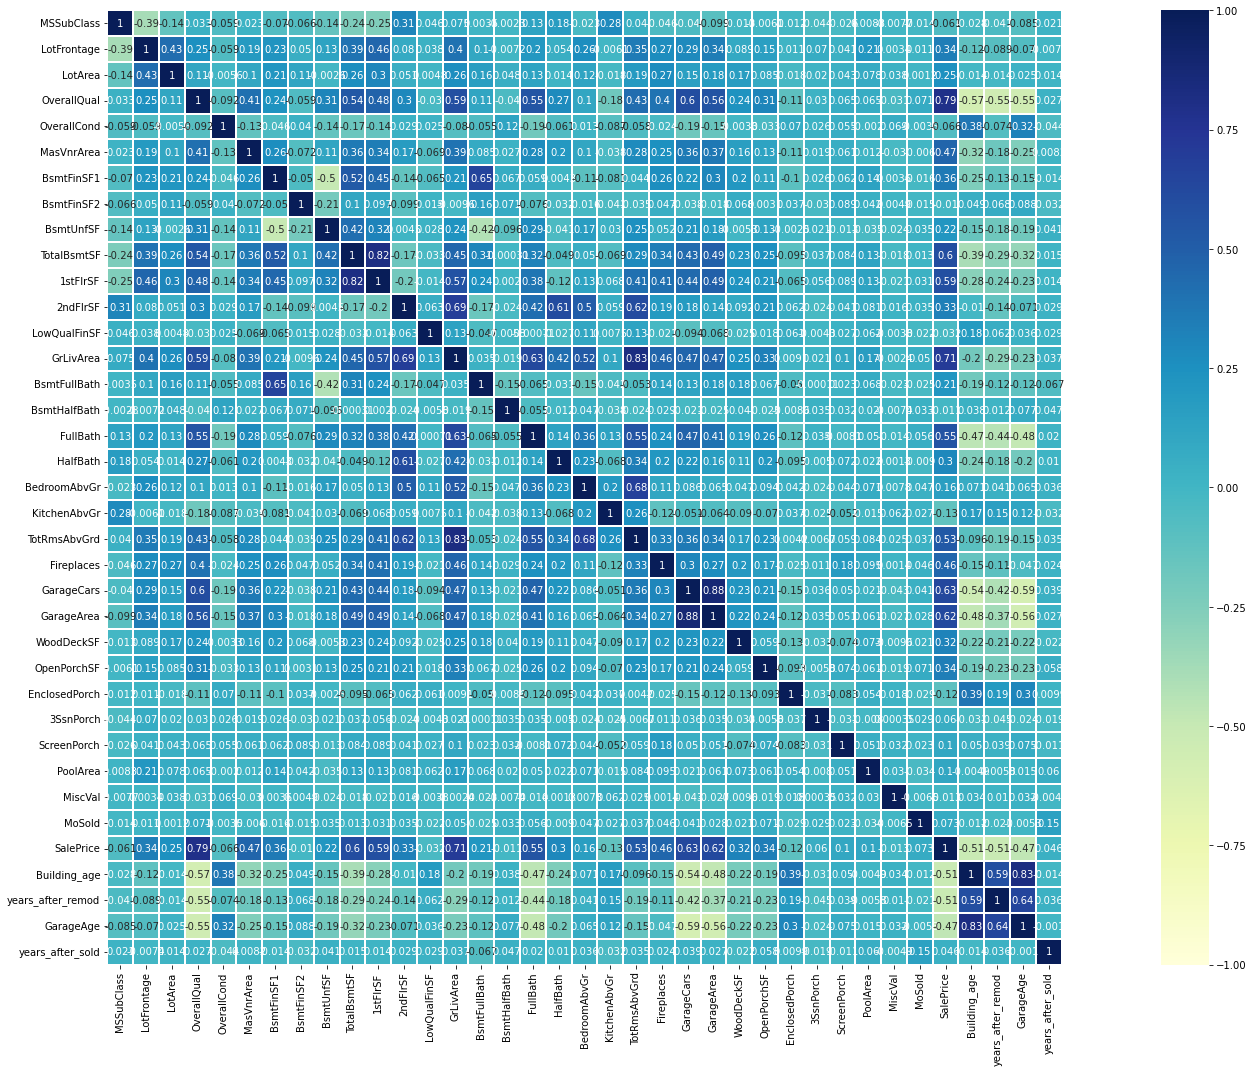

In [15]:
df_corr = df.corr()
plt.figure(figsize = (28,15))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=0.1,cmap="YlGnBu")
plt.tight_layout()

Looking at the above heat map we can say that many features are in good correlation with our target variable (i.e. OverallQual, GrLivArea)and also many features are having very poor relation with the target variable (i.e. Building area, years_after_remod, GarageAge).

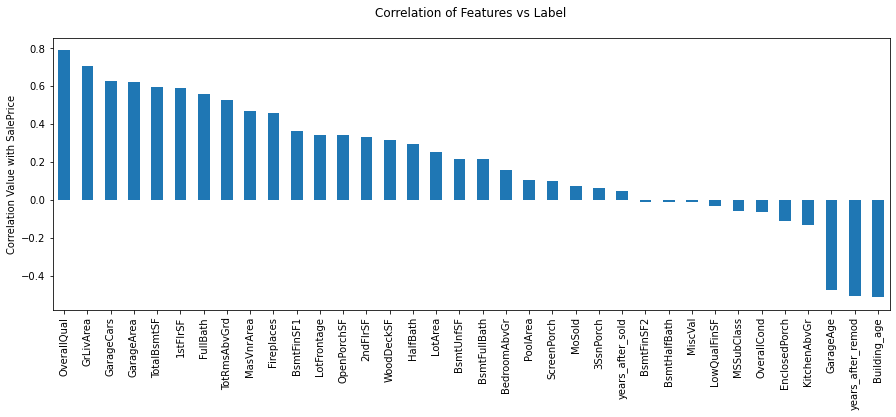

In [16]:
df_corr = df.corr()
plt.figure(figsize=(15,5))
df_corr['SalePrice'].sort_values( ascending = False).drop('SalePrice').plot.bar()
plt.title("Correlation of Features vs Label\n")
plt.ylabel("Correlation Value with SalePrice")
plt.show()

obeserve the above Correlation of Features vs Label plot we can say that the features like overall quality, grlivArea, GarageCars, garage area are having maximum positive relation with the target variable.

# Data Visualization:

In [17]:
col_1 = ['LotFrontage','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'LotArea', 'Building_age', 'years_after_remod',
        'GarageAge', 'years_after_sold', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
        'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']

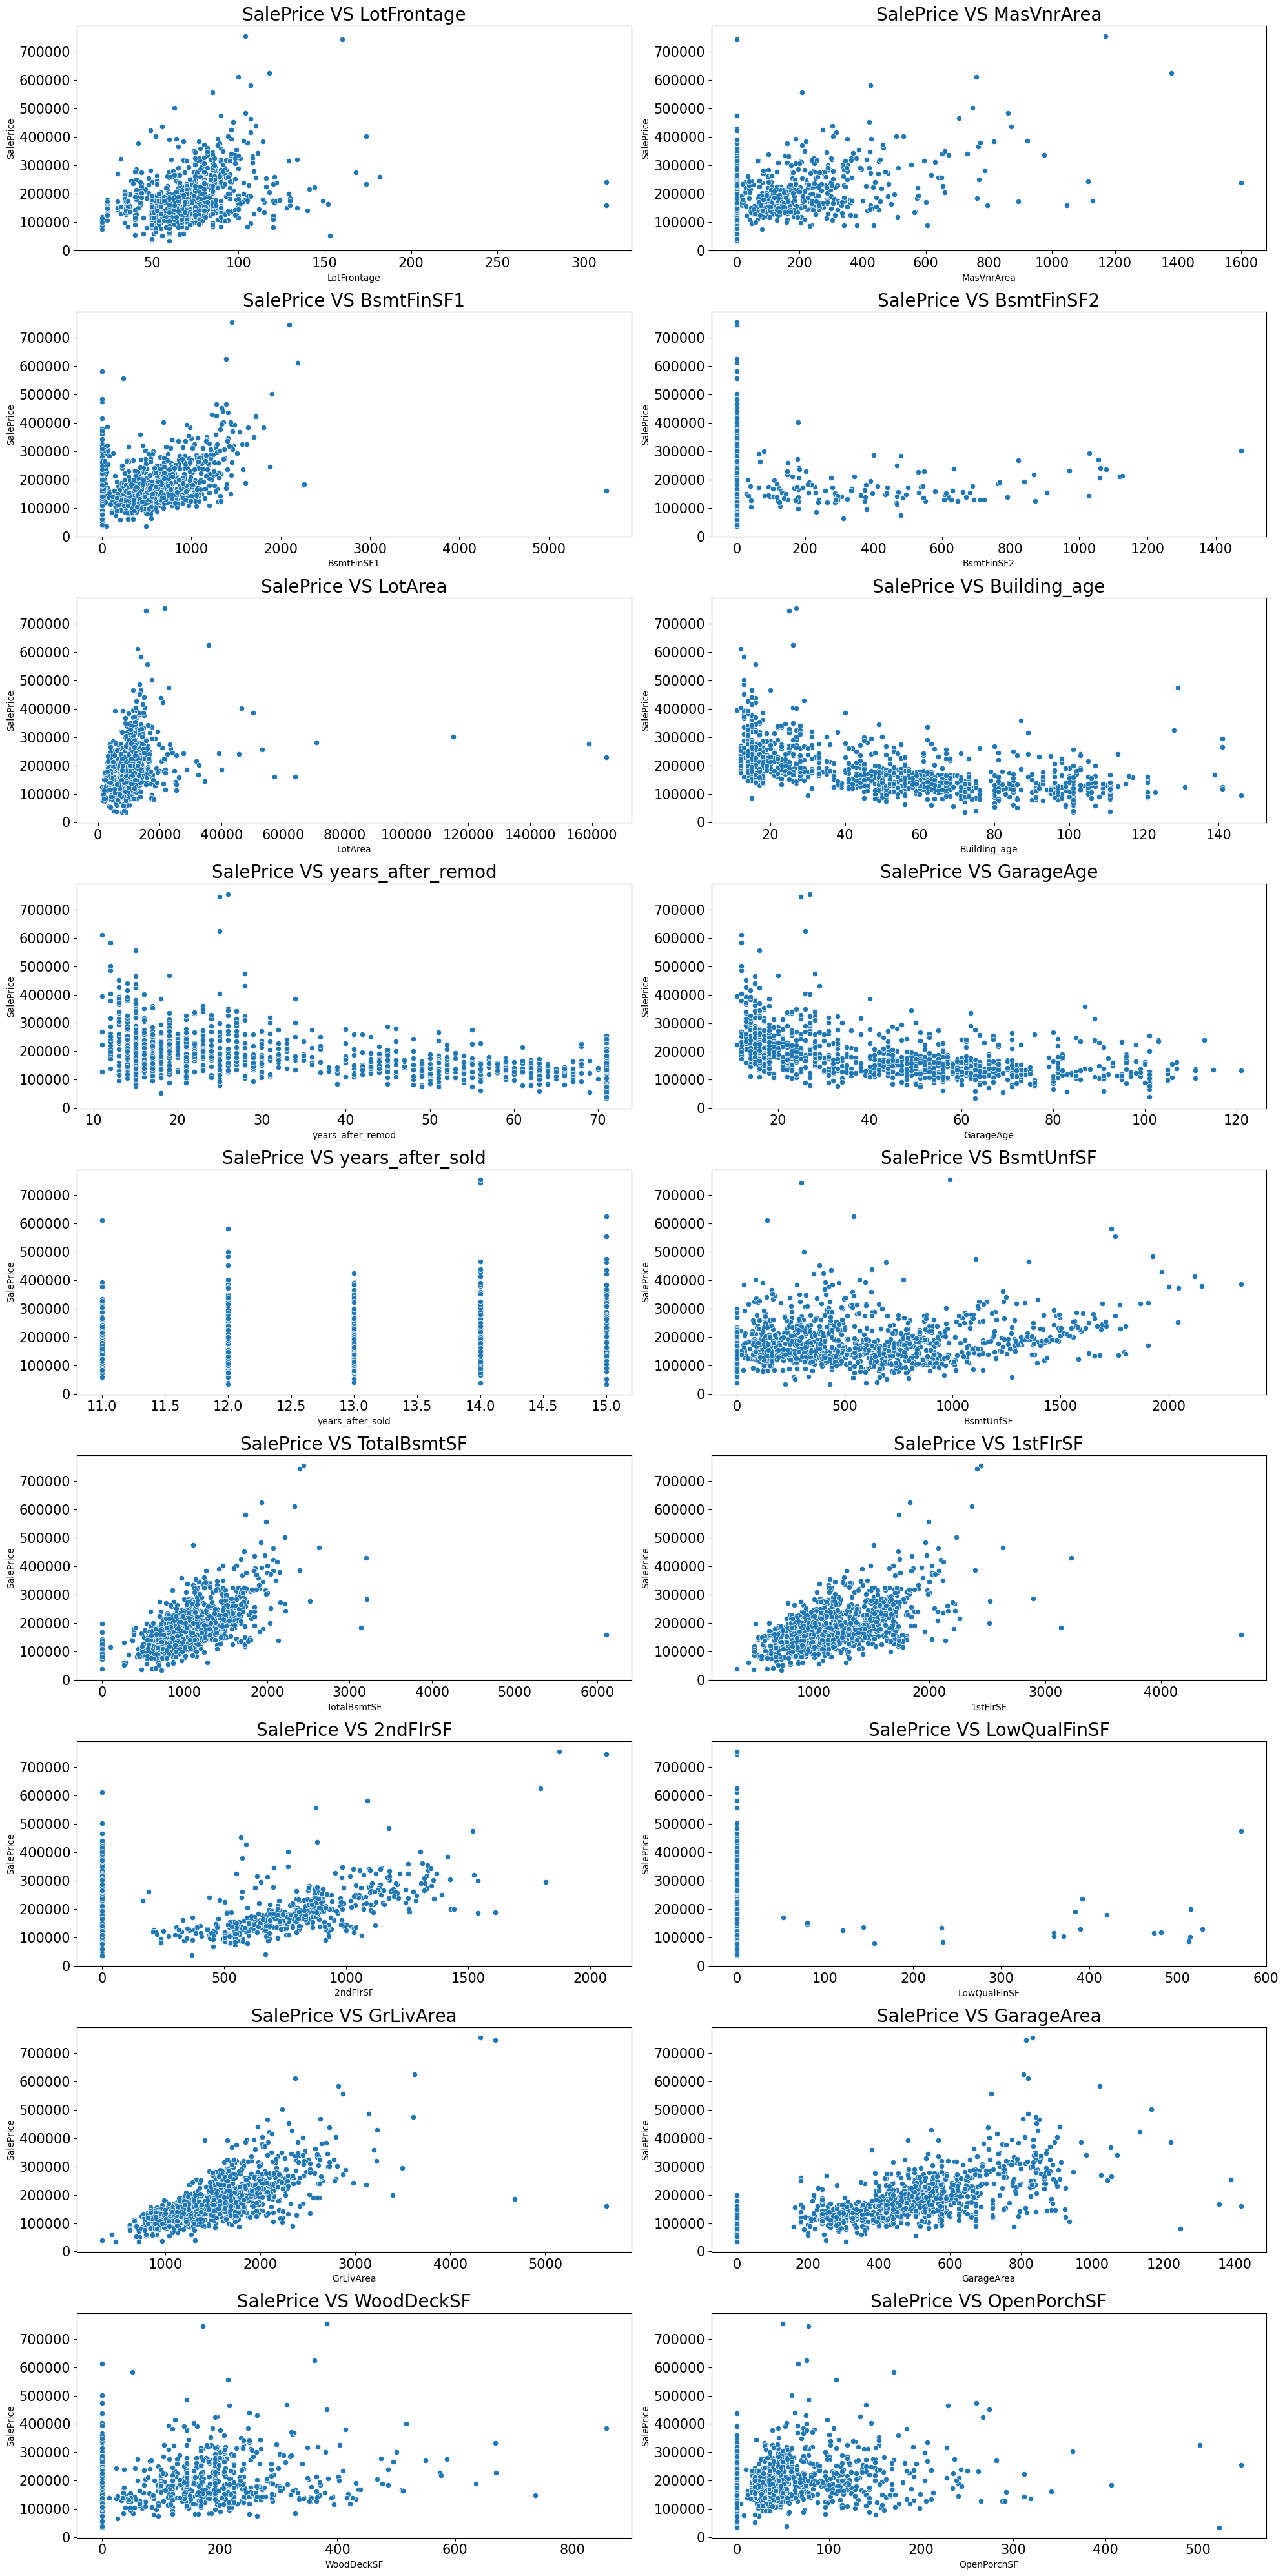

In [18]:
# Scatter plot of some numerical columns features vs SalePrice:

plt.style.use('default')
plt.figure(figsize=(20,40))
for i in range(len(col_1)):
    plt.subplot(9,2,i+1)
    sns.scatterplot(y=df['SalePrice'],x=df[col_1[i]])
    plt.title(f"SalePrice VS {col_1[i]}",fontsize=20)
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15)
    plt.tight_layout()

Above scatter plots are showing the relation between some numerical features vs SalesPrice.

.If the linear feet of street connected to property is more, then the sales price is higher.

.The Masonry veneer area increases the price of the house also get higher.

.If the house is with more area of type 1 finished the price is higher.

.There are less number of houses with type 2 finish as the area for type two is given zero for most houses.

.As the lot size get higher the price also will increases.

.The buildings which have built long back are having less sales price compare to new buildings. Similarly As if Building modification has done long back then the price is less.

.If garages have been built recently the building is having higher sales price


.We can see almost all the buildings have been sold in recent years.

.We can see that in most of the cases the Unfinished basement area is below 1000 square feets And it will also tell us that the Sales prices will increase as total basement area increases.

.We can see that most houses are having more area at first floor compare to second floor And some of the houses are not having rooms at second floor.

.Sales prices increases with the floor area.

.We can see most of the houses are with very less area finished with low quality, and also it is observed that more area finished with low quality causes reduction in sale price.

.And as above grade (ground) living area and garage area increases the sale price also increases.

In [20]:
col=['MSSubClass','OverallQual','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath', 
     'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces', 'GarageCars','MoSold']

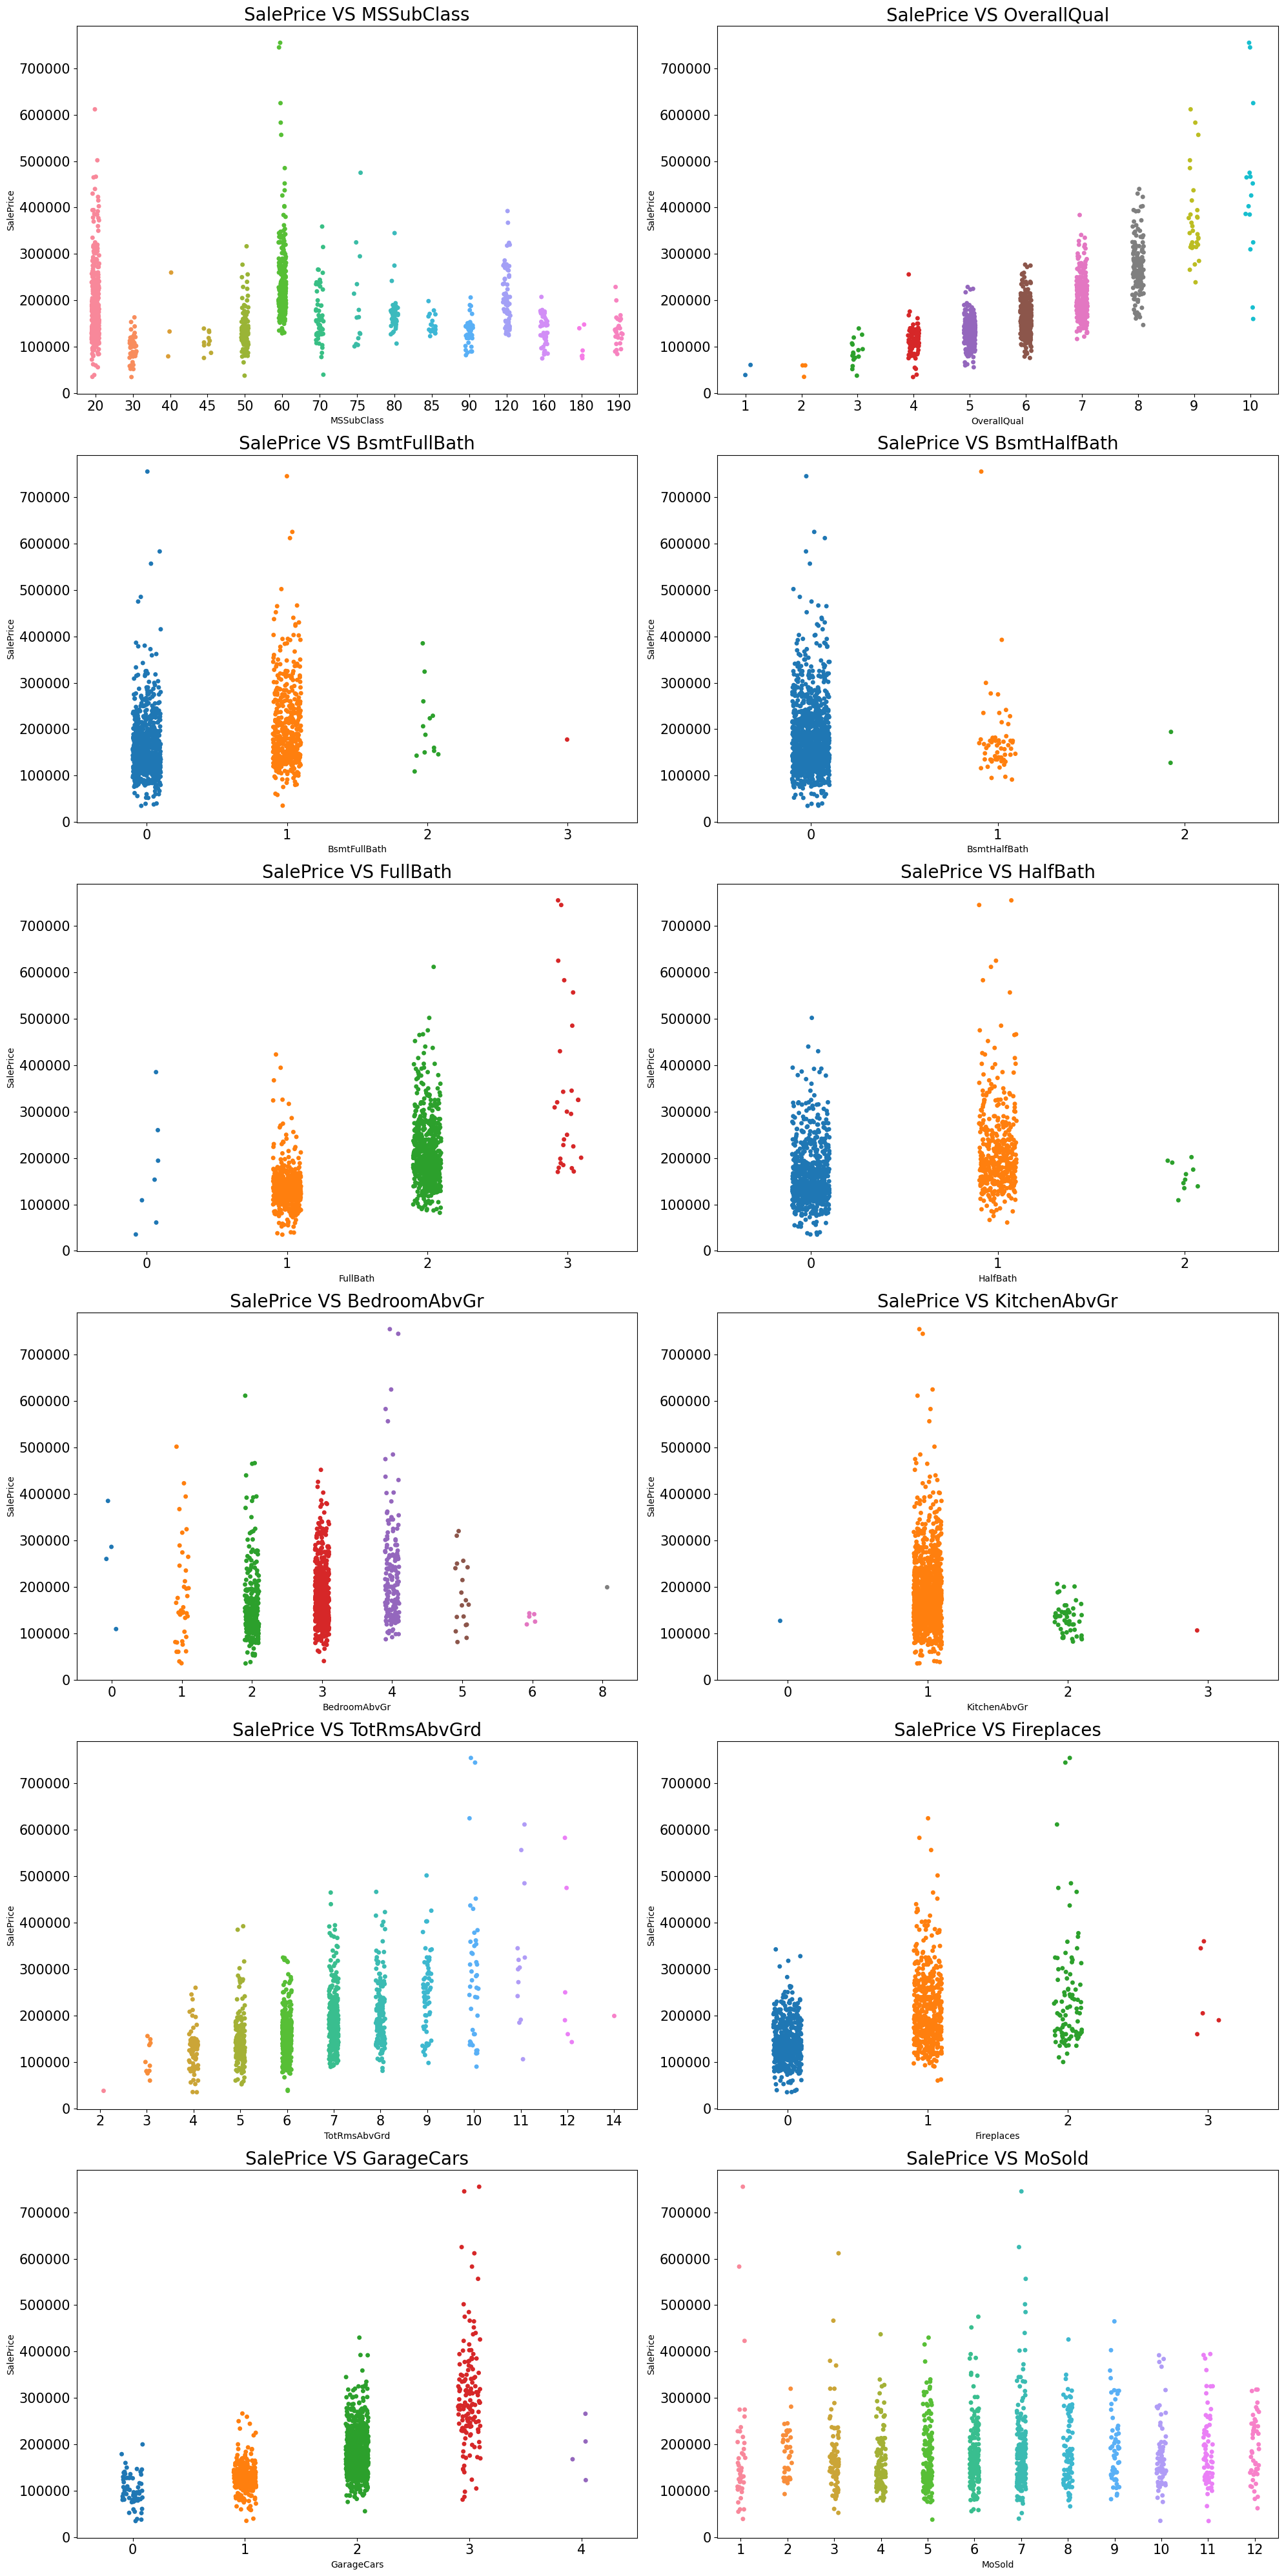

In [21]:
# Stripplot of some numerical columns features vs SalePrice:

plt.style.use('default')
plt.figure(figsize=(20,40))
for i in range(len(col)):
    plt.subplot(6,2,i+1)
    sns.stripplot(y=df['SalePrice'],x=df[col[i]])
    plt.title(f"SalePrice VS {col[i]}",fontsize=20)
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15)
    plt.tight_layout()

.Looking at above strip plot we can say that more number of MSSubClass are 20 and 60 and having higher sale prices also
.
.We can see there is good linear relation between OverallQual and SalePrice, that is as quality increases the price of the house   also gets higher.

.Most of the house data shows basement full bathrooms as 0 and 1, and it seems like the number of basement bathrooms is not       affecting our sales price.

.Most of the houses are not having basement half bathrooms.

.There is some relation is observed between full bathrooms above grade and salePrice. Large count of houses are with 1 - 2 full   bathrooms above grade.

.Many houses are with zero and 1 half-bathrooms, and very few with 2 half_bathrooms.

.Large number of houses are having 2 to 4 bedrooms and having higher prices. And very few houses are with more than 5 bedrooms     which are having lower price.

.Most of the houses are having single kitchen and some houses with two kitchens. Sale price is higher in case of houses with       single kitchen.

.We can observe some linear relation between Total rooms above grade and Sale Prices as the number of rooms increases the price   also goes up.

.Some houses are not having fire places and some are with 1 to 2 fire places, very few houses are haveing 3 fire places.

.Sales price of house increases with the Size of garage in car capacity. But as the size of garage increases beyond 3 the price   comes down.

.We can see that MoSold column is havng the data from every column and it may not have any significant impact on our target       variable.

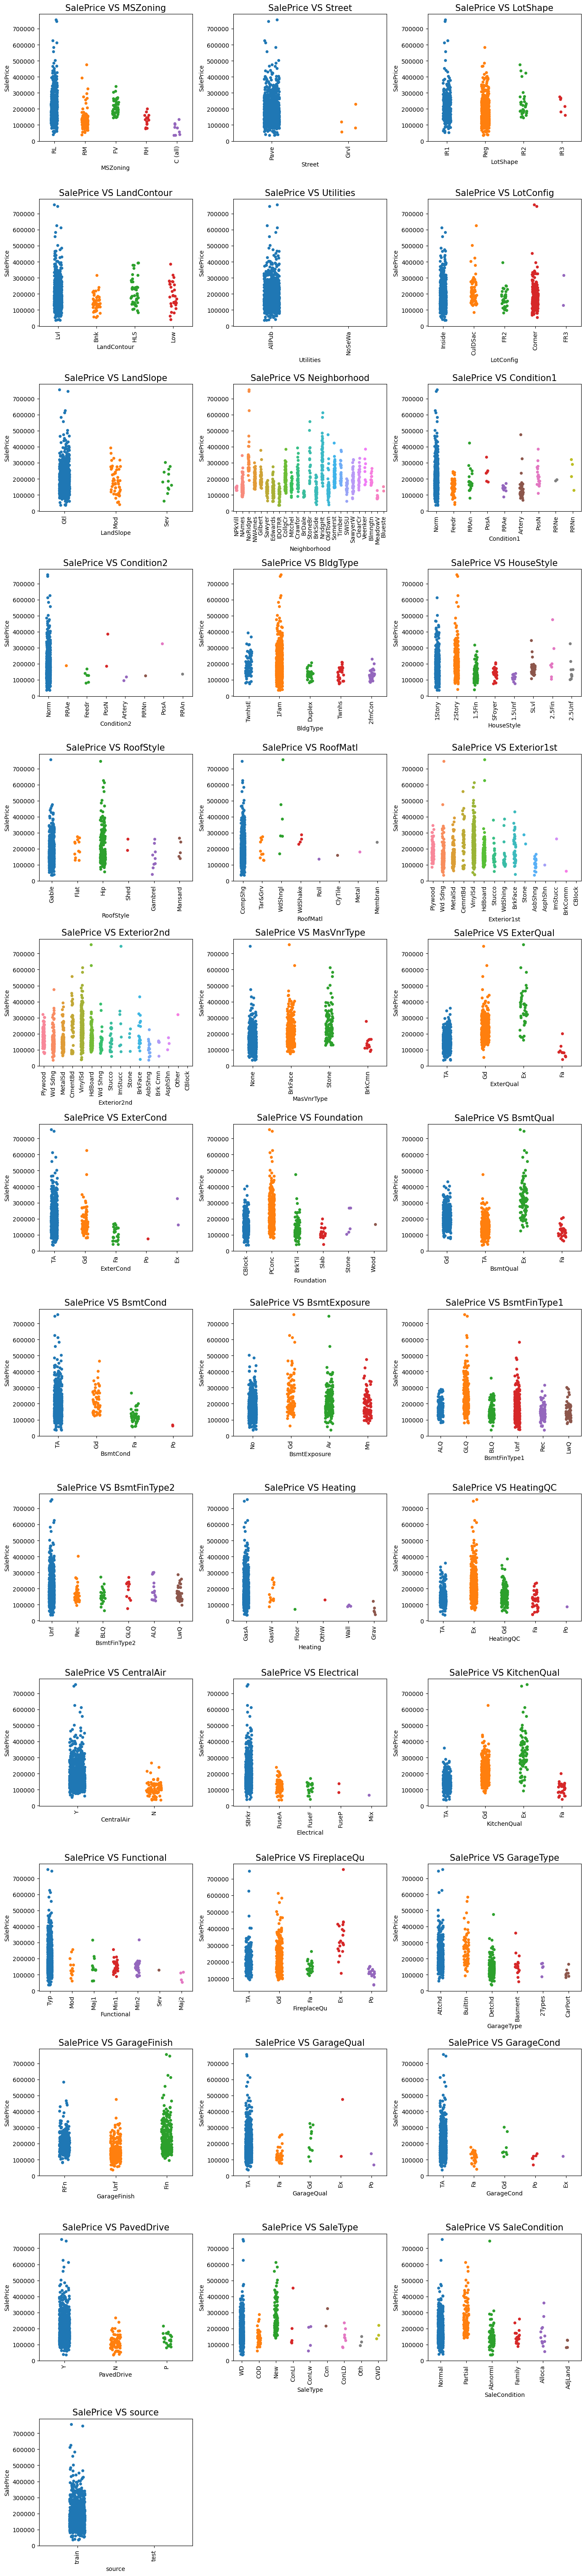

In [22]:
# Stripplot of all catagorical features vs SalePrice:

col1 = df.select_dtypes(exclude=[np.number]).columns
plt.style.use('default')
plt.figure(figsize=(14,65))
for i in range(len(col1)):
    plt.subplot(15,3,i+1)
    sns.stripplot(y=df['SalePrice'],x=df[col1[i]])
    plt.title(f"SalePrice VS {col1[i]}",fontsize=15)
    plt.xticks(rotation = 90)  
    plt.tight_layout()

Most of the houses are belongs to Residential Low Density zone. and many houses from this zone are having higher prices than other zones.

We can observe almost all houses are having paved streets and very few are having gravel streets.

Large number of houses are having General shape of property slightly irregular or regular. very few are having irregular shape.

looking at the SalePrice vs LandContour plot we can say that most of the houses are nearly Flat/Leveled.

Almost all houses are with all kind of utilities.

More number of lots are inside or at corners.

Looking at plot for SalePrice vs Condition1 we can see that most number of houses bearing normal conditions.

Looking at the plot for SalePrice vs Condition2 we can see that most houses having normal conditions and very few with other conditions.

Most houses are Single-family Detached and are having higher sale prices than other categories.

Looking at the plot of SalePrice vs HouseStyle we can see that the houses which are having style of dweling 1-story and 2-story are having higher prices than other types.

The prices of houses are higher when material used for exterior are good or excellent.

It is observed that the present conditions of exterior material is mostly average/typical and good and prices for the same are higher.

Most houses are with good and average kitchen quality, houses are having higher prices when kitchen quality is excellent.

Mostly houses are with typical functionality and very less numberof houses are having severely damaged functionality.

In vary rare cases fire place are prefabricated fireplace in basement and ben franklin Stove and these houses are having lower prices.

In most of the cases garage is attatched to the house only. And when garage is attatched to home or Built-In the house prises are higher and it seems like garage finish does not affect much to sale prices. Mostly garages are with typical/average quality and conditions.

Most of the houses are having paved drive ways





*Many houses are having Sale type of Warranty Deed - Conventional and just constructed and sold and are having higher prices.

Also many houses are having sale conditions as Normal Sale and Home was not completed when last assessed (associated with New Homes).

In [23]:
#dropping unwanted columns
df.drop(columns = ['LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],inplace = True)

In [28]:
 df.drop(columns = ['Utilities','Heating'], inplace = True)

In [29]:
df.describe().T

count           mean           std      min        25%  \
MSSubClass         1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage        1201.0      70.049958     24.284752     21.0      59.00   
LotArea            1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual        1460.0       6.099315      1.382997      1.0       5.00   
OverallCond        1460.0       5.575342      1.112799      1.0       5.00   
MasVnrArea         1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1         1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2         1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF          1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF        1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF           1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF           1460.0     346.992466    436.528436      0.0       0.00   
GrLivArea          1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath       1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath       1460.0       0.057534      0.238753      0.0       0.00   
FullBath           1460.0       1.565068      0.550916      0.0       1.00   
HalfBath           1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr       1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr       1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd       1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces         1460.0       0.613014      0.644666      0.0       0.00   
GarageCars         1460.0       1.767123      0.747315      0.0       1.00   
GarageArea         1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF         1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF        1460.0      46.660274     66.256028      0.0       0.00   
MoSold             1460.0       6.321918      2.703626      1.0       5.00   
SalePrice          1168.0  181477.005993  79105.586863  34900.0  130375.00   
Building_age       1460.0      49.732192     30.202904     11.0      21.00   
years_after_remod  1460.0      36.134247     20.645407     11.0      17.00   
GarageAge          1379.0      42.493836     24.689725     11.0      19.00   
years_after_sold   1460.0      13.184247      1.328095     11.0      12.00   

                        50%        75%       max  
MSSubClass             50.0      70.00     190.0  
LotFrontage            69.0      80.00     313.0  
LotArea              9478.5   11601.50  215245.0  
OverallQual             6.0       7.00      10.0  
OverallCond             5.0       6.00       9.0  
MasVnrArea              0.0     166.00    1600.0  
BsmtFinSF1            383.5     712.25    5644.0  
BsmtFinSF2              0.0       0.00    1474.0  
BsmtUnfSF             477.5     808.00    2336.0  
TotalBsmtSF           991.5    1298.25    6110.0  
1stFlrSF             1087.0    1391.25    4692.0  
2ndFlrSF                0.0     728.00    2065.0  
GrLivArea            1464.0    1776.75    5642.0  
BsmtFullBath            0.0       1.00       3.0  
BsmtHalfBath            0.0       0.00       2.0  
FullBath                2.0       2.00       3.0  
HalfBath                0.0       1.00       2.0  
BedroomAbvGr            3.0       3.00       8.0  
KitchenAbvGr            1.0       1.00       3.0  
TotRmsAbvGrd            6.0       7.00      14.0  
Fireplaces              1.0       1.00       3.0  
GarageCars              2.0       2.00       4.0  
GarageArea            480.0     576.00    1418.0  
WoodDeckSF              0.0     168.00     857.0  
OpenPorchSF            25.0      68.00     547.0  
MoSold                  6.0       8.00      12.0  
SalePrice          163995.0  215000.00  755000.0  
Building_age           48.0      67.00     149.0  
years_after_remod      27.0      54.00      

For columns are having less missing values I have replaced categorical data with mode and numerical data with the mean of that particular column.

In [30]:
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.mean()))
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

for col in ['FireplaceQu','GarageType','GarageFinish','BsmtFinType2','GarageQual',
            'GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','MasVnrType']:
    df[col] = df[col].fillna('None')
    
for col in ['GarageAge','MasVnrArea']:
      df[col] = df[col].fillna(0)
        
# Some of the categorical columns are having the ratings based on specific condition, So we will replace those with numbers
column = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond']
for i in column:
    df[i] = df[i].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})


In [31]:
df.describe().T

count           mean           std      min        25%  \
MSSubClass         1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage        1460.0      70.725218     22.426978     21.0      60.00   
LotArea            1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual        1460.0       6.099315      1.382997      1.0       5.00   
OverallCond        1460.0       5.575342      1.112799      1.0       5.00   
MasVnrArea         1460.0     103.117123    180.731373      0.0       0.00   
ExterQual          1460.0       3.395890      0.574280      2.0       3.00   
ExterCond          1460.0       3.083562      0.351054      1.0       3.00   
BsmtQual           1460.0       3.489041      0.876478      0.0       3.00   
BsmtCond           1460.0       2.934932      0.552159      0.0       3.00   
BsmtFinSF1         1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2         1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF          1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF        1460.0    1057.429452    438.705324      0.0     795.75   
HeatingQC          1460.0       4.145205      0.959501      1.0       3.00   
1stFlrSF           1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF           1460.0     346.992466    436.528436      0.0       0.00   
GrLivArea          1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath       1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath       1460.0       0.057534      0.238753      0.0       0.00   
FullBath           1460.0       1.565068      0.550916      0.0       1.00   
HalfBath           1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr       1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr       1460.0       1.046575      0.220338      0.0       1.00   
KitchenQual        1460.0       3.511644      0.663760      2.0       3.00   
TotRmsAbvGrd       1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces         1460.0       0.613014      0.644666      0.0       0.00   
FireplaceQu        1460.0       1.825342      1.810877      0.0       0.00   
GarageCars         1460.0       1.767123      0.747315      0.0       1.00   
GarageArea         1460.0     472.980137    213.804841      0.0     334.50   
GarageQual         1460.0       2.810274      0.722898      0.0       3.00   
GarageCond         1460.0       2.808904      0.719685      0.0       3.00   
WoodDeckSF         1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF        1460.0      46.660274     66.256028      0.0       0.00   
MoSold             1460.0       6.321918      2.703626      1.0       5.00   
SalePrice          1168.0  181477.005993  79105.586863  34900.0  130375.00   
Building_age       1460.0      49.732192     30.202904     11.0      21.00   
years_after_remod  1460.0      36.134247     20.645407     11.0      17.00   
GarageAge          1460.0      40.136301     25.892617      0.0      18.00   
years_after_sold   1460.0      13.184247      1.328095     11.0      12.00   

                             50%        75%       max  
MSSubClass             50.000000      70.00     190.0  
LotFrontage            70.083333      80.00     313.0  
LotArea              9478.500000   11601.50  215245.0  
OverallQual             6.000000       7.00      10.0  
OverallCond             5.000000       6.00       9.0  
MasVnrArea              0.000000     164.25    1600.0  
ExterQual               3.000000       4.00       5.0  
ExterCond               3.000000       3.00       5.0  
BsmtQual                4.000000       4.00       5.0  
BsmtCond                3.000000       3.00       4.0  
BsmtFinSF1            383.500000     712.25    5644.0  
BsmtFinSF2              0.000000       0.00    1474.0  
BsmtUnfSF             477.500000     808.00    2336.0  
TotalBsmtSF           991.500000    1

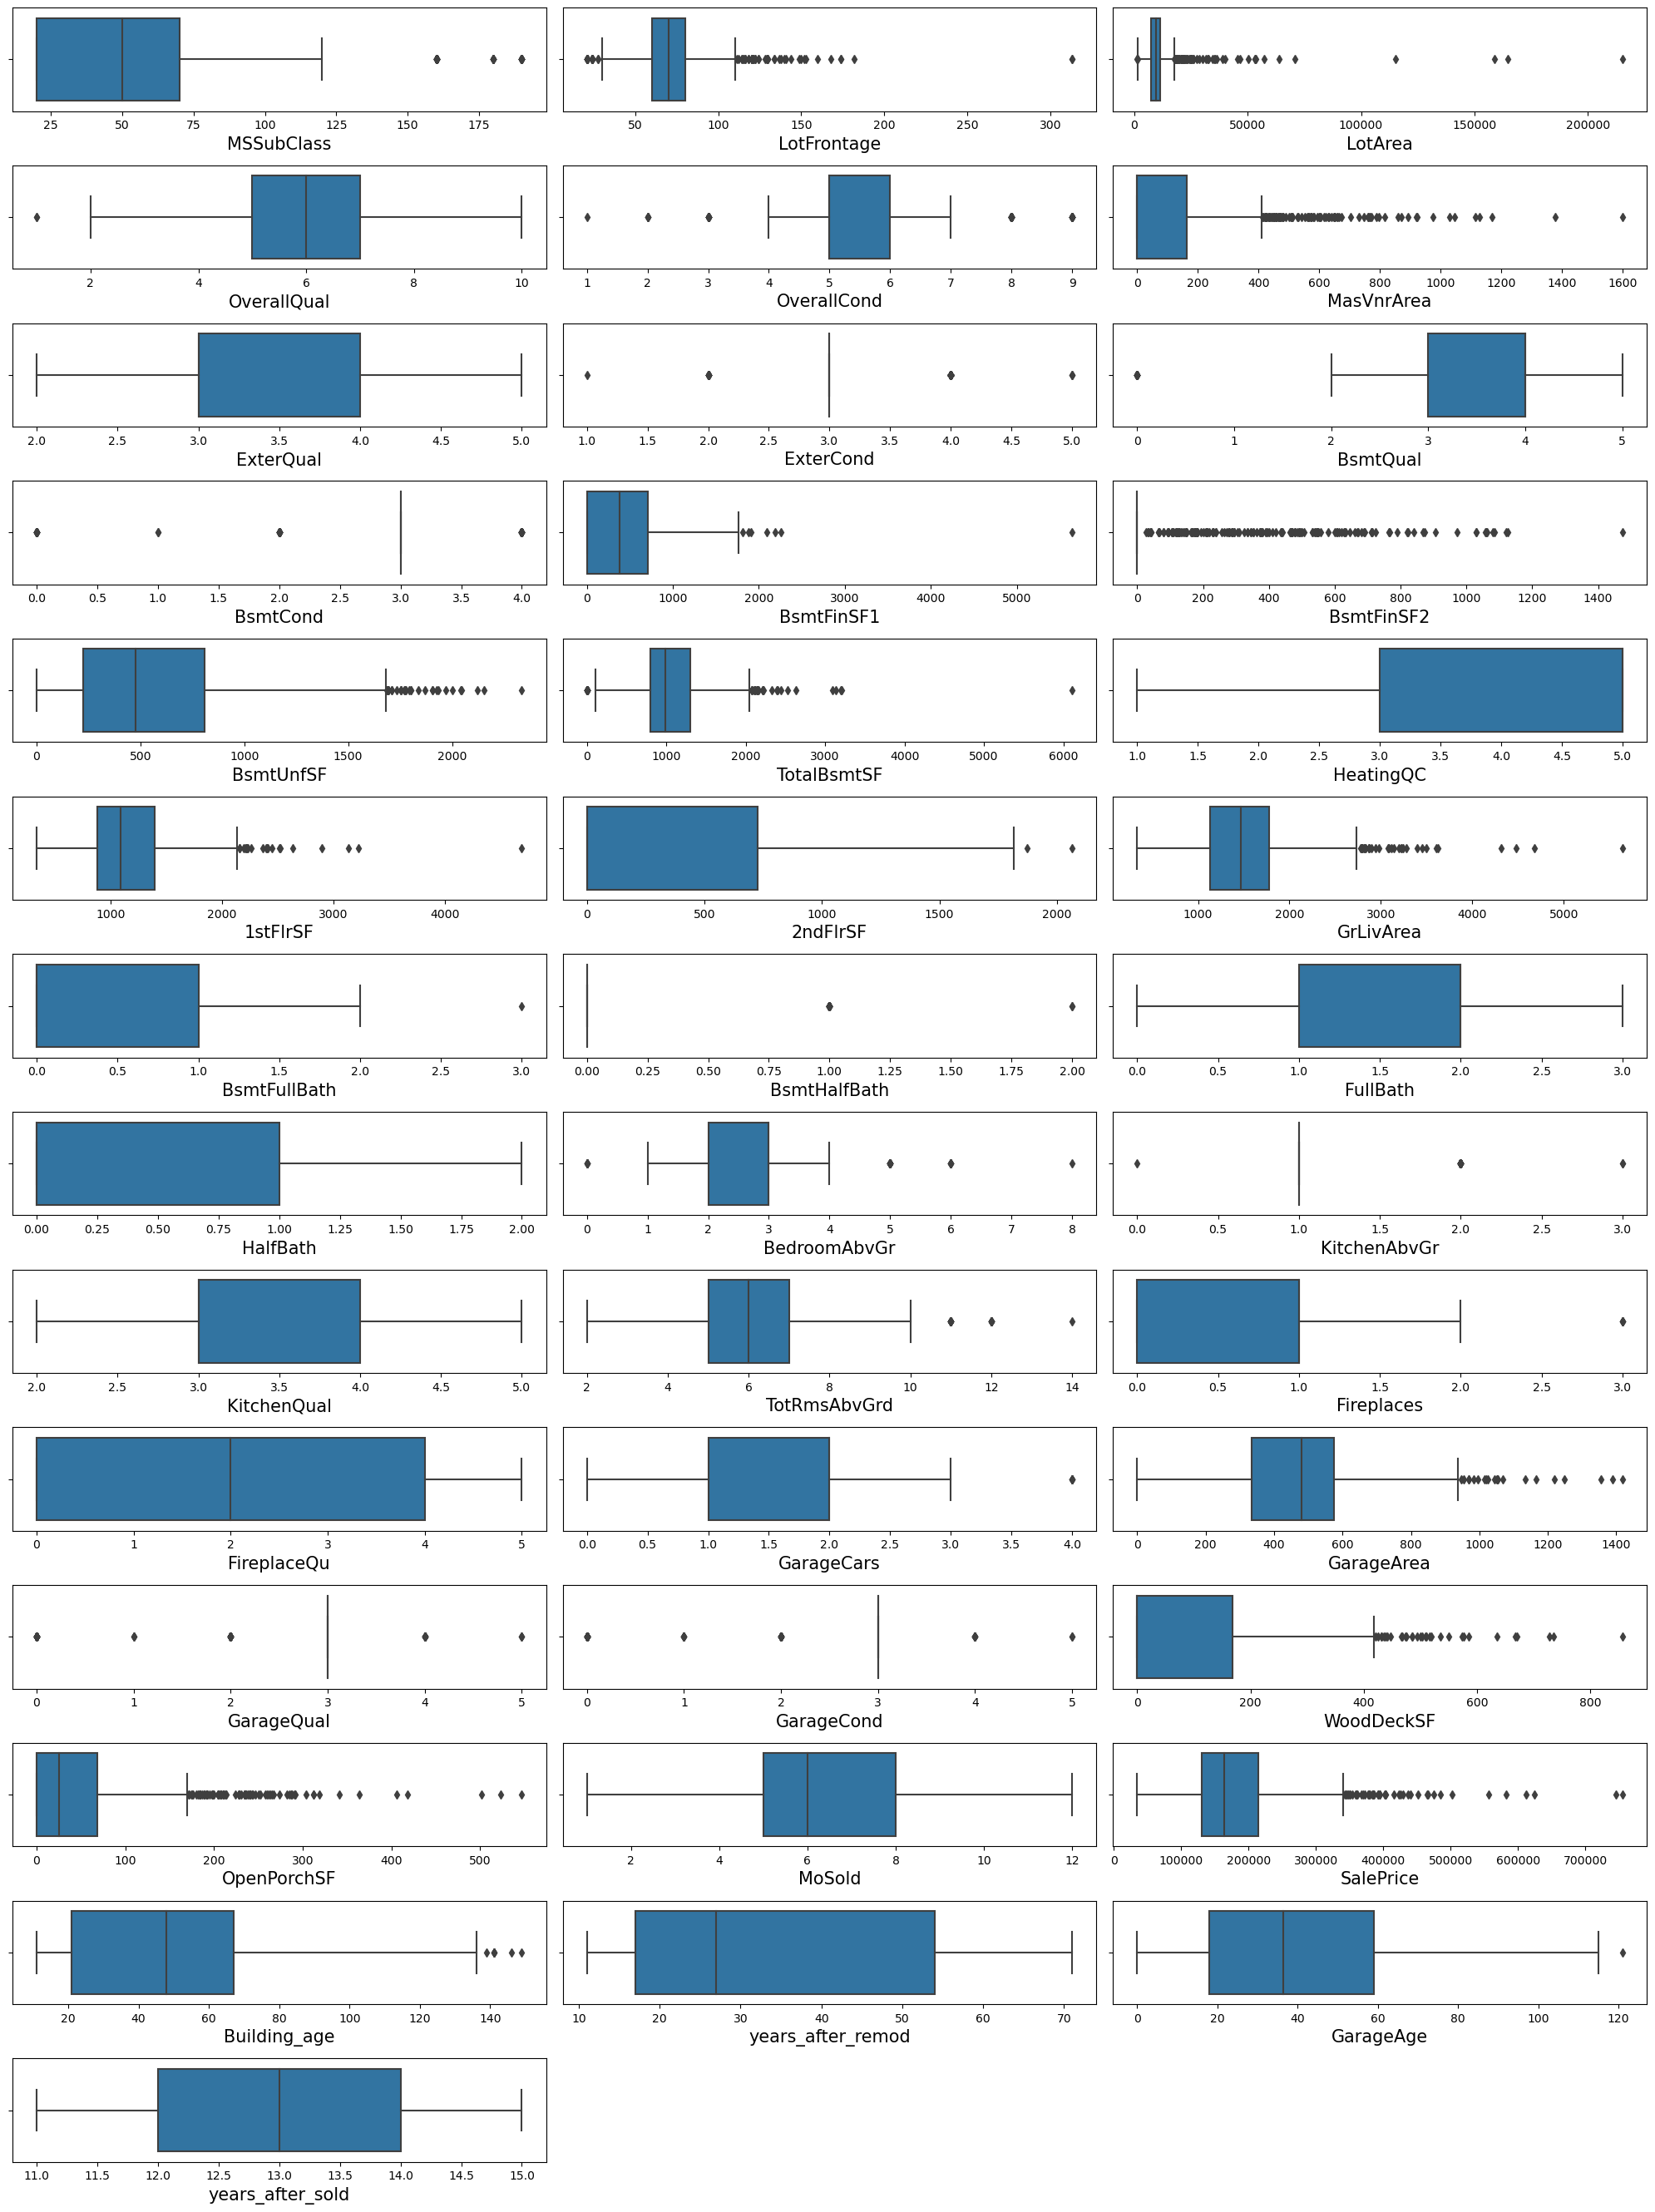

In [32]:
#lets check outliers from continuous columns

num_data = df._get_numeric_data()
plt.figure(figsize = (20,30), facecolor='white')
plotnumber = 1
for column in num_data:
    if plotnumber <=50:
        ax = plt.subplot(16,3,plotnumber)
        sns.boxplot(num_data[column])
        plt.xlabel(column,fontsize = 15)
    plotnumber+=1
plt.tight_layout()

we are obeserve so many columns are having outliers

In [34]:
column = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond']
for col in df.columns:
    if df[col].dtypes != 'object':
        percentile = df[col].quantile([0.01,0.98]).values
        df[col][df[col]<=percentile[0]]=percentile[0]
        df[col][df[col]>=percentile[1]]=percentile[1]

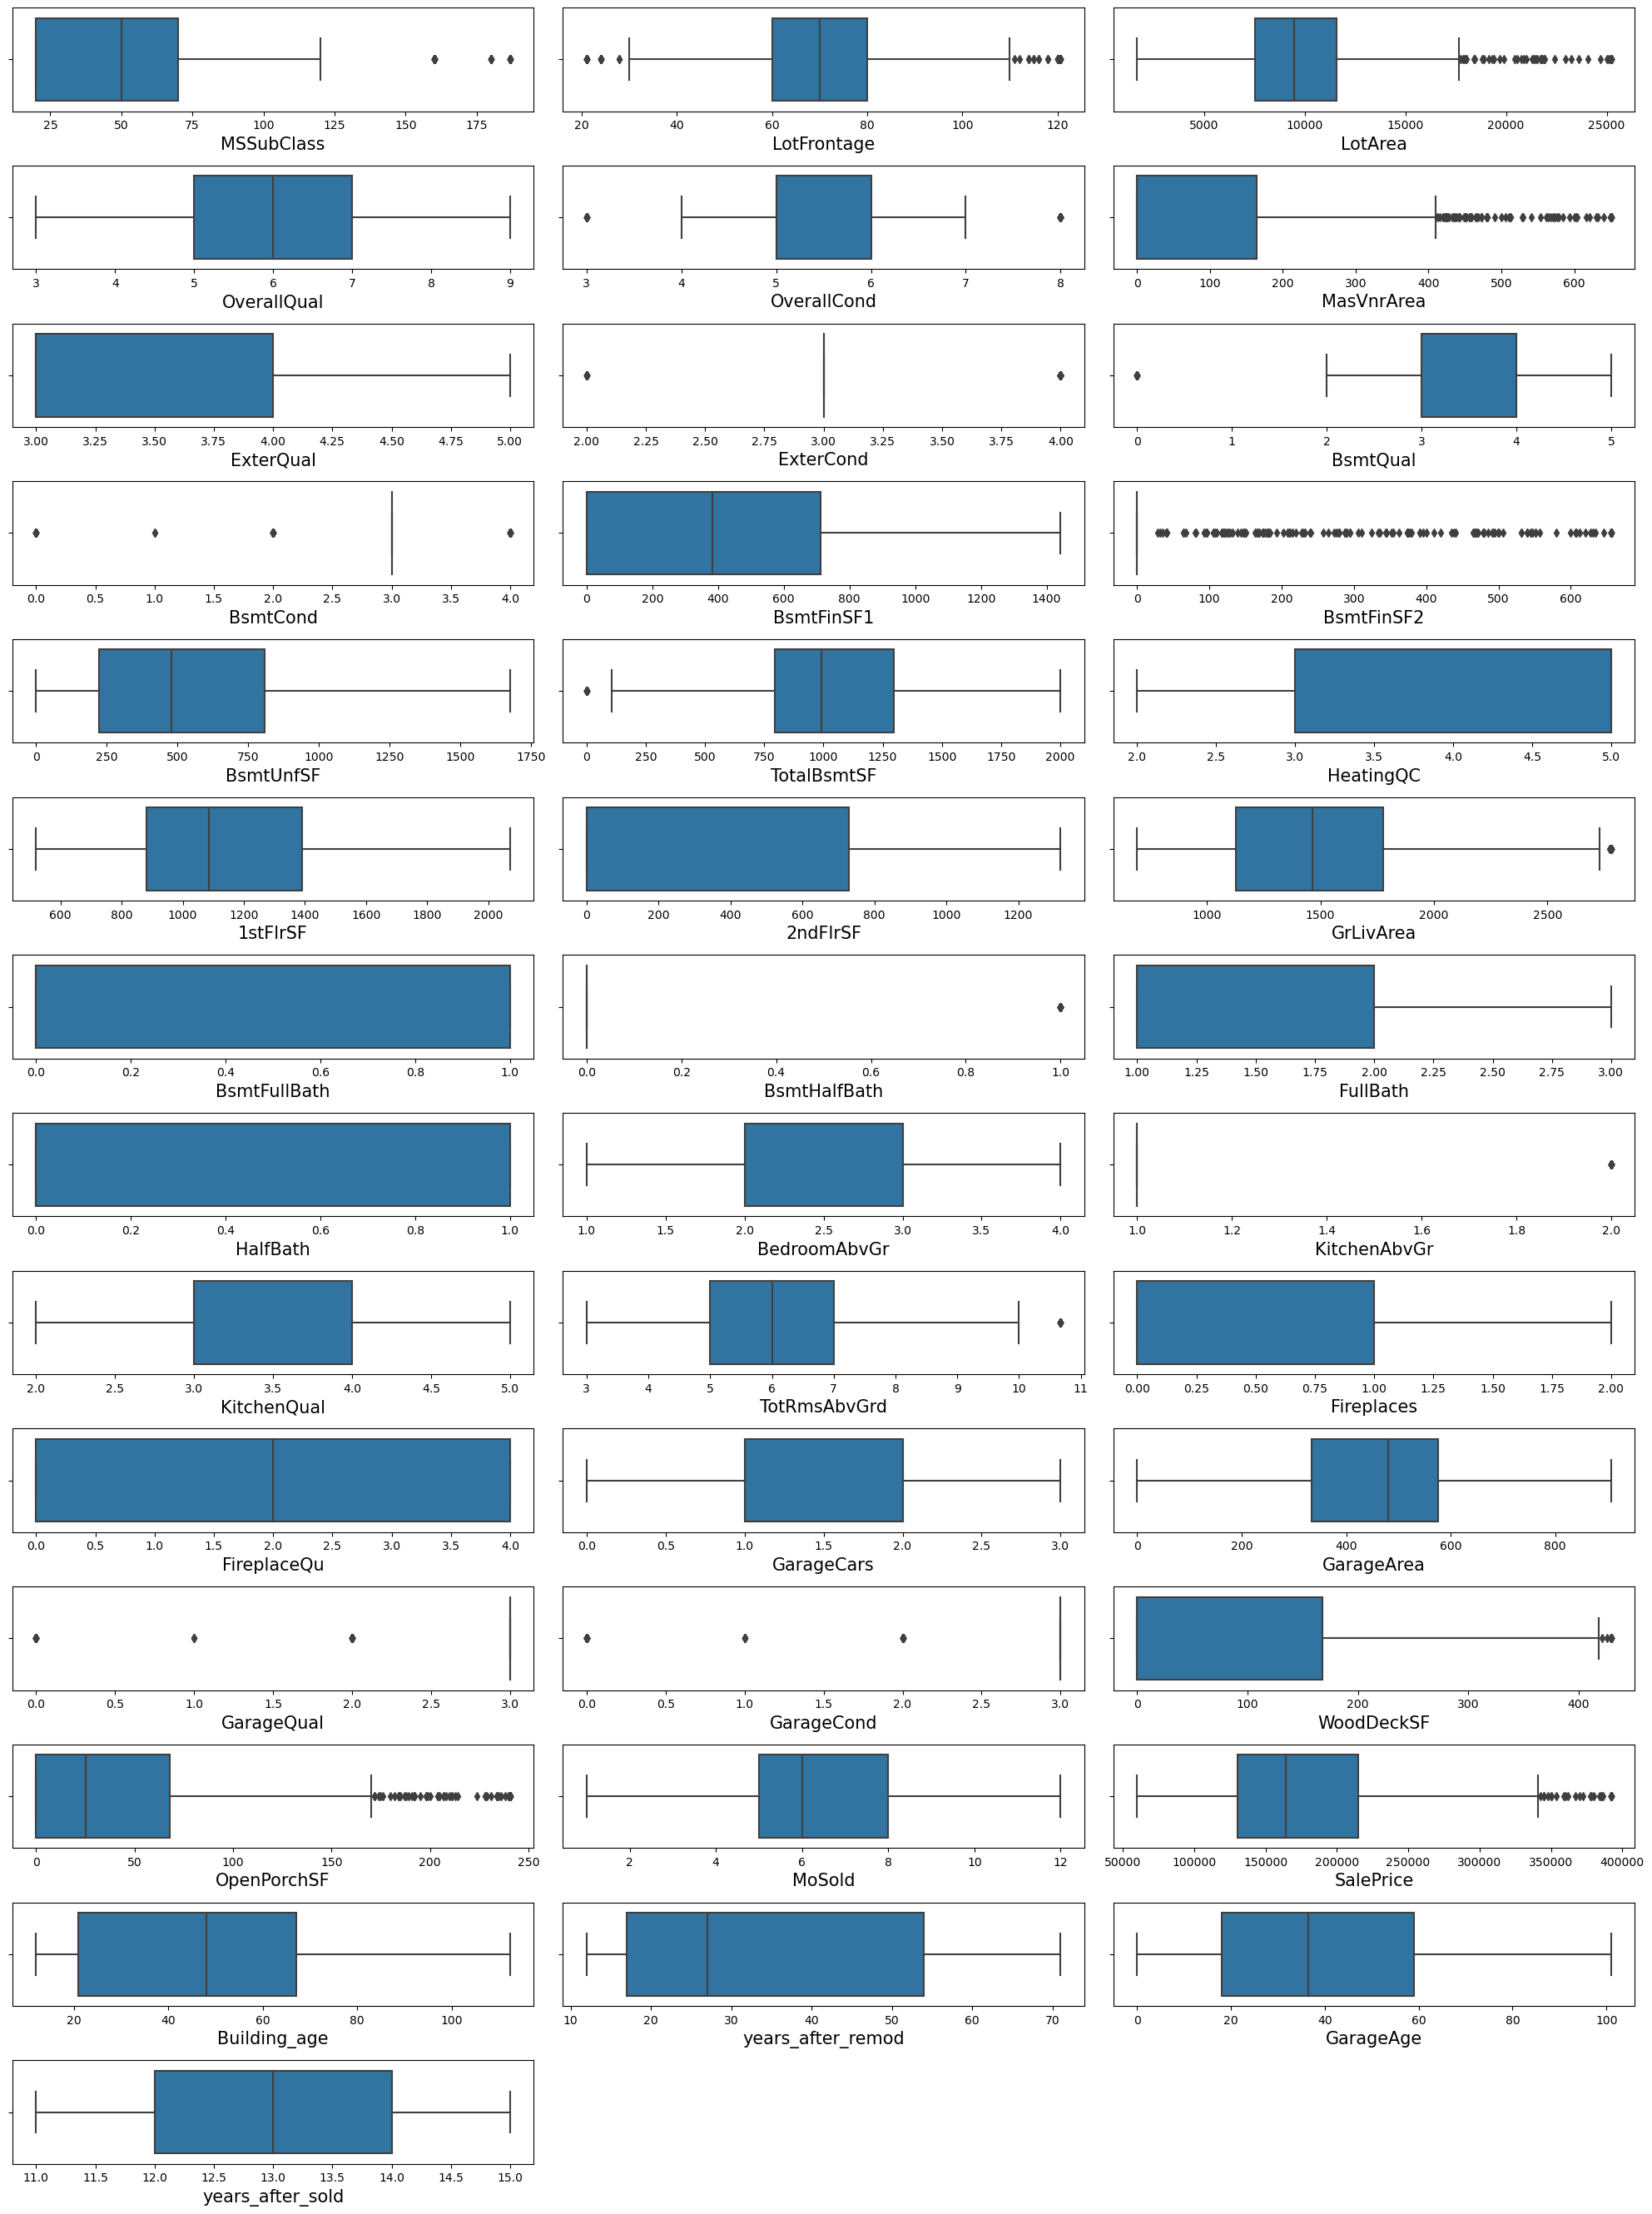

In [36]:
#lets check outliers from continuous columns

num_data = df._get_numeric_data()
plt.figure(figsize = (20,30), facecolor='white')
plotnumber = 1
for column in num_data:
    if plotnumber <=50:
        ax = plt.subplot(16,3,plotnumber)
        sns.boxplot(num_data[column])
        plt.xlabel(column,fontsize = 15)
    plotnumber+=1
plt.tight_layout()


In [37]:
df.shape

(1460, 69)

Removing Outliers:

In [38]:
#lets remove outliers using zscore method
from scipy import stats
from scipy.stats import zscore
z_score = zscore(df[['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC',
                     'KitchenQual','FireplaceQu','GarageQual','GarageCond']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.reset_index(inplace = True)

In [39]:
df.shape

(1333, 70)

In [40]:
# checking the data loss
data_loss = (1460-1333)/1333*100
print(f"""data_loss : {data_loss} %""")

data_loss : 9.527381845461365 %


we are loosing 9.5% of data, which is acceptable.

# train and test datasets:

In [41]:
#Divide into test and train:
df_train = df.loc[df['source']== 'train']
df_test = df.loc[df['source']== 'test']
df_test.reset_index(drop=True,inplace=True)

In [42]:
df_train.drop(columns = 'source', inplace = True)
df_test.drop(columns = 'source', inplace = True)

In [43]:
#lets saperate data into label and features
x = df_train.drop(columns = 'SalePrice')
y = df_train["SalePrice"]

In [44]:
x.shape

(1065, 68)

In [45]:
y.shape

(1065,)

In [46]:
x.skew()

index                0.007343
MSSubClass           1.371857
LotFrontage          0.035905
LotArea              1.173972
OverallQual          0.166435
OverallCond          0.746107
MasVnrArea           1.764590
ExterQual            0.834278
ExterCond            2.561631
BsmtQual             0.229684
BsmtCond             0.837910
BsmtFinSF1           0.569520
BsmtFinSF2           3.361620
BsmtUnfSF            0.777097
TotalBsmtSF          0.603555
HeatingQC           -0.574474
1stFlrSF             0.599962
2ndFlrSF             0.662321
GrLivArea            0.615465
BsmtFullBath         0.271381
BsmtHalfBath         3.778815
FullBath             0.096364
HalfBath             0.384915
BedroomAbvGr        -0.346038
KitchenAbvGr         5.711466
KitchenQual          0.356556
TotRmsAbvGrd         0.494860
Fireplaces           0.460626
FireplaceQu         -0.043138
GarageCars           0.076032
GarageArea           0.426380
GarageQual          -4.941099
GarageCond          -7.027661
WoodDeckSF

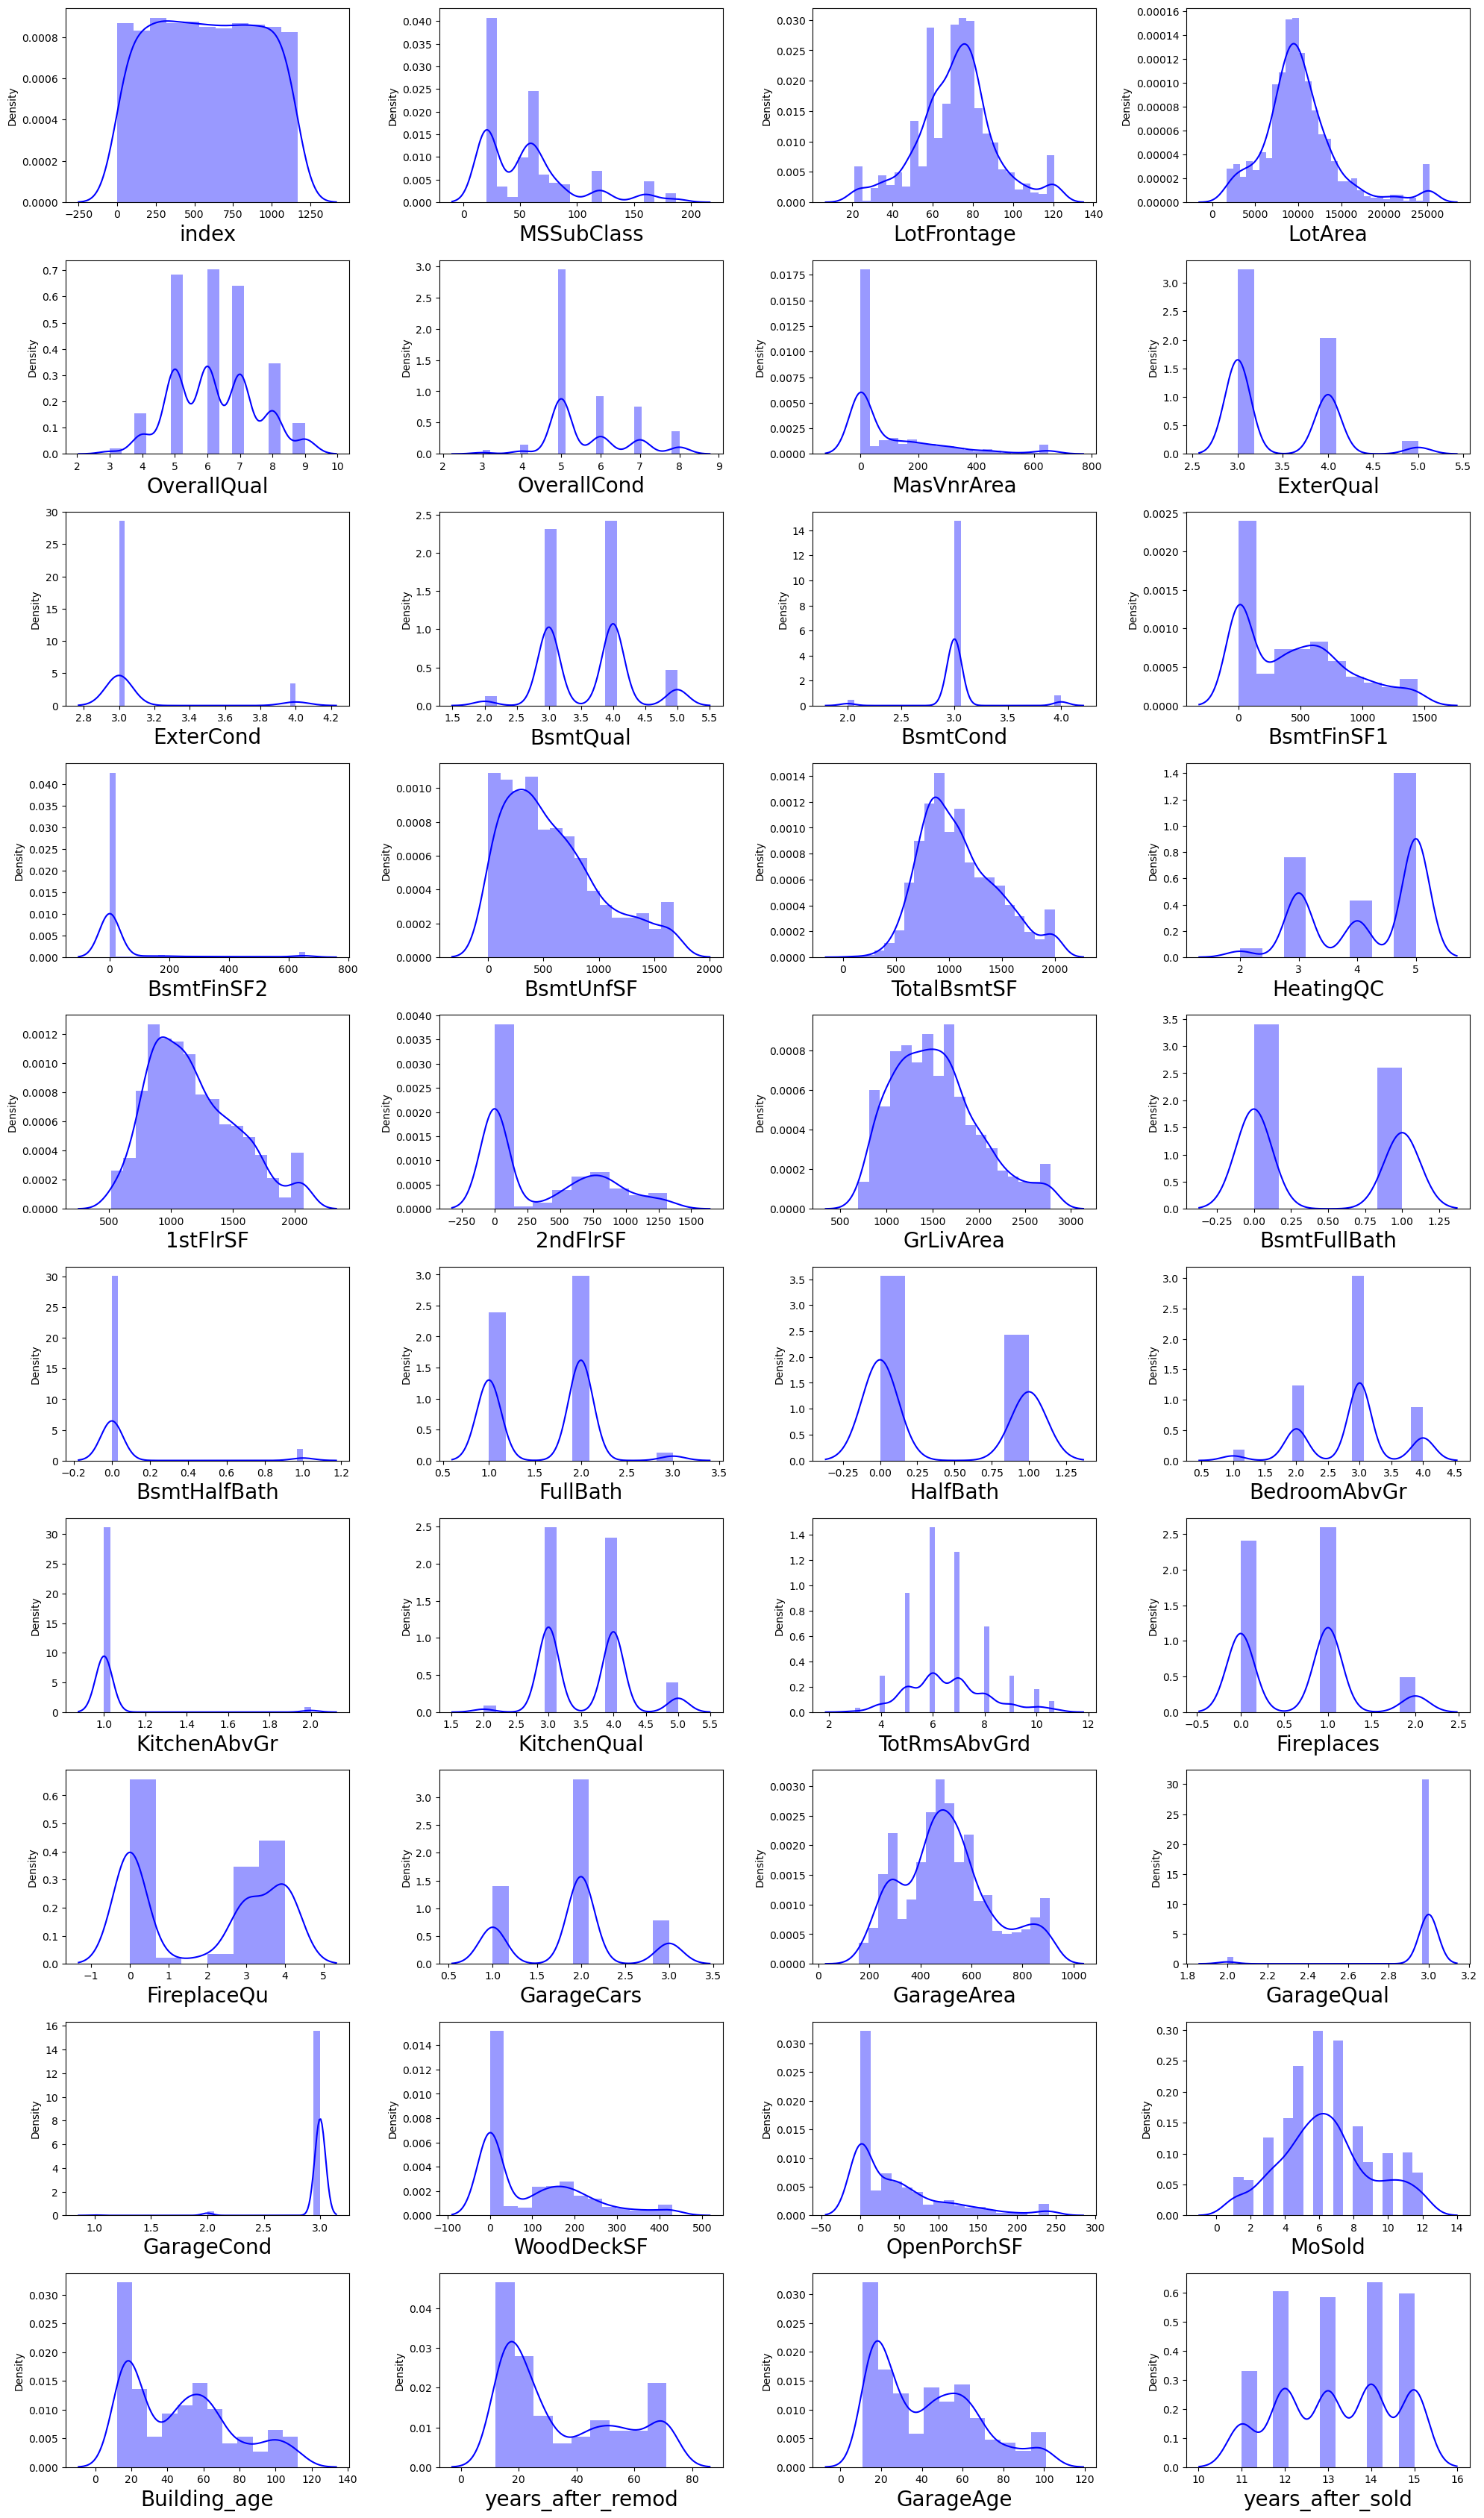

In [47]:
num_data = x._get_numeric_data()

plt.figure(figsize = (20,40))
plotnumber = 1
for column in num_data:
    if plotnumber <=81:
        ax = plt.subplot(12,4,plotnumber)
        sns.distplot(num_data[column],color = 'b')
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

we are looking some coloumns have the eye-catching skewness.

In [48]:
#Lets treat the skewness
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.log1p(x[index])
        if x.skew().loc[index]<-0.5:
            x[index]=np.square(x[index])

In [49]:
x.skew()

index                0.007343
MSSubClass           0.211581
LotFrontage          0.035905
LotArea             -0.713223
OverallQual          0.166435
OverallCond          0.280198
MasVnrArea           0.403516
ExterQual            0.686393
ExterCond            2.561631
BsmtQual             0.229684
BsmtCond            -0.410104
BsmtFinSF1          -0.497742
BsmtFinSF2           2.349496
BsmtUnfSF           -1.088138
TotalBsmtSF         -0.454407
HeatingQC           -0.574474
1stFlrSF            -0.045098
2ndFlrSF             0.251015
GrLivArea           -0.050685
BsmtFullBath         0.271381
BsmtHalfBath         3.778815
FullBath             0.096364
HalfBath             0.384915
BedroomAbvGr        -0.346038
KitchenAbvGr         5.711466
KitchenQual          0.356556
TotRmsAbvGrd         0.494860
Fireplaces           0.460626
FireplaceQu         -0.043138
GarageCars           0.076032
GarageArea           0.426380
GarageQual          -4.941099
GarageCond          -7.027661
WoodDeckSF

In [50]:
num_data = x.select_dtypes(include = [np.number])
cat_data = x.select_dtypes(exclude=[np.number])

In [51]:
cat_data.head()

MSZoning Street LotShape LandContour LotConfig LandSlope Neighborhood  \
0       RL   Pave      IR1         Lvl    Inside       Gtl      NPkVill   
1       RL   Pave      IR1         Lvl    Inside       Mod        NAmes   
2       RL   Pave      IR1         Lvl   CulDSac       Gtl      NoRidge   
3       RL   Pave      IR1         Lvl    Inside       Gtl       NWAmes   
4       RL   Pave      IR1         Lvl       FR2       Gtl       NWAmes   

  Condition1 Condition2 BldgType  ... BsmtFinType1 BsmtFinType2 CentralAir  \
0       Norm       Norm   TwnhsE  ...          ALQ          Unf          Y   
1       Norm       Norm     1Fam  ...          ALQ          Rec          Y   
2       Norm       Norm     1Fam  ...          GLQ          Unf          Y   
3       Norm       Norm     1Fam  ...          BLQ          Unf          Y   
4       Norm       Norm     1Fam  ...          ALQ          Unf          Y   

  Electrical Functional GarageType GarageFinish PavedDrive SaleType  \
0      SBrkr        Typ     Attchd          RFn          Y       WD   
1      SBrkr        Typ     Attchd          Unf          Y       WD   
2      SBrkr        Typ     Attchd          Unf          Y       WD   
3      SBrkr        Typ     Attchd          RFn          Y      COD   
4      SBrkr        Typ     Attchd          Fin          Y       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3        Normal  
4        Normal  

[5 rows x 28 columns]

# numerical data

In [52]:
#Lets bring all numerical features to common scale by applying standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num = scaler.fit_transform(num_data)
num = pd.DataFrame(num,columns=num_data.columns)

In [53]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
for i in cat_data.columns:
    cat_data[i] = enc.fit_transform(cat_data[i].values.reshape(-1,1))

In [54]:
num.head()

index  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0 -1.729644    1.461985    -2.045342 -1.350199    -0.183836    -0.568604   
1 -1.726660   -1.125646     1.219771  1.214267     1.370016     0.445558   
2 -1.723677    0.449969     1.063582  0.144654     0.593090    -0.568604   
3 -1.720693   -1.125646     1.740405  0.524355    -0.183836     0.445558   
4 -1.717709   -1.125646     0.505926  1.325183    -0.183836     1.324065   

   MasVnrArea  ExterQual  ExterCond  BsmtQual  ...  GarageArea  GarageQual  \
0   -0.846325  -0.802012  -0.344525  0.578747  ...   -0.366295    0.194966   
1   -0.846325   1.003277   2.902547 -0.892292  ...    0.660828    0.194966   
2   -0.846325   1.003277  -0.344525  0.578747  ...   -0.281175    0.194966   
3    1.497766  -0.802012  -0.344525  0.578747  ...    0.235224    0.194966   
4    0.992318   1.003277  -0.344525  0.578747  ...    0.138754    0.194966   

   GarageCond  WoodDeckSF  OpenPorchSF    MoSold  Building_age  \
0    0.156938   -0.997129     1.367505 -1.635874      0.223833   
1    0.156938    0.694069     1.372028  1.339078      0.412065   
2    0.156938    0.997935     1.155562 -0.148398     -0.652129   
3    0.156938   -0.997129     1.126059 -2.007743      0.190089   
4    0.156938    1.107810    -1.126995 -0.148398      0.190089   

   years_after_remod  GarageAge  years_after_sold  
0           0.719765   0.359708          0.599968  
1           0.935716   0.599094          0.599968  
2          -0.354275  -0.613500          0.599968  
3           0.681051   0.359708         -1.663193  
4          -0.579440   0.359708         -0.908806  

[5 rows x 40 columns]

In [55]:
num.shape

(1065, 40)

In [56]:
#combining categorical and numerical data:
X = pd.concat([num, cat_data], axis = 1)
X.head()

index  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0 -1.729644    1.461985    -2.045342 -1.350199    -0.183836    -0.568604   
1 -1.726660   -1.125646     1.219771  1.214267     1.370016     0.445558   
2 -1.723677    0.449969     1.063582  0.144654     0.593090    -0.568604   
3 -1.720693   -1.125646     1.740405  0.524355    -0.183836     0.445558   
4 -1.717709   -1.125646     0.505926  1.325183    -0.183836     1.324065   

   MasVnrArea  ExterQual  ExterCond  BsmtQual  ...  BsmtFinType1  \
0   -0.846325  -0.802012  -0.344525  0.578747  ...           0.0   
1   -0.846325   1.003277   2.902547 -0.892292  ...           0.0   
2   -0.846325   1.003277  -0.344525  0.578747  ...           2.0   
3    1.497766  -0.802012  -0.344525  0.578747  ...           1.0   
4    0.992318   1.003277  -0.344525  0.578747  ...           0.0   

   BsmtFinType2  CentralAir  Electrical  Functional  GarageType  GarageFinish  \
0           6.0         1.0         2.0         6.0         1.0           1.0   
1           5.0         1.0         2.0         6.0         1.0           2.0   
2           6.0         1.0         2.0         6.0         1.0           2.0   
3           6.0         1.0         2.0         6.0         1.0           1.0   
4           6.0         1.0         2.0         6.0         1.0           0.0   

   PavedDrive  SaleType  SaleCondition  
0         2.0       8.0            4.0  
1         2.0       8.0            4.0  
2         2.0       8.0            4.0  
3         2.0       0.0            4.0  
4         2.0       8.0            4.0  

[5 rows x 68 columns]

In [57]:
x.shape

(1065, 68)

In [58]:
# modling building,Random State for Data Split:


#model selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold, cross_val_score

#model evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [59]:
# To find random stat which gives maximum r2_score

from sklearn.linear_model import LinearRegression
max_r_score=0
r_state = 0
for i in range(10,1000):
    x_train, x_test, y_train, y_test = train_test_split(X, np.log(y),test_size = 0.28,random_state = r_state)
    reg = LinearRegression()
    reg.fit(x_train,y_train)
    y_pred = reg.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr > max_r_score:
        max_r_score = r2_scr
        r_state = i
print("max r2 score is",max_r_score,"on Random State",r_state)


max r2 score is 0.8960229706226411 on Random State 13


In [60]:
#lets split our train data into train and test part with our best random state
x_train, x_test, y_train, y_test = train_test_split(X, np.log(y),test_size = 0.28,random_state = r_state)



Building a function for model with evaluation:

In [61]:
def BuiltModel(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_train)
    pred = model.predict(x_test)

    r2score = r2_score(y_test,pred)*100

    #evaluation
    mse = mean_squared_error(y_test,pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test,pred)
    print("MAE :", mae)
    print("RMSE :", rmse)
    print('------------------------------')

    # r2 score
    print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%','\n')
    print(f"Testing r2 Score (Accuracy score):", r2score,"%")
    print('------------------------------')

    #cross validation score
    scores = cross_val_score(model, X, y, cv = 10).mean()*100
    print("\nCross validation score :", scores)

    #result of accuracy minus cv score
    result = r2score - scores
    print("\nAccuracy Score - Cross Validation Score :", result)

    sns.regplot(y_test, pred, color ='crimson')
    plt.show()   

1. LinearRegression Model

MAE : 0.08950859232004336
RMSE : 0.1260152027681219
------------------------------
Training r2 Score : 91.30919951929337 % 

Testing r2 Score (Accuracy score): 86.66235523096444 %
------------------------------

Cross validation score : 84.33892382394455

Accuracy Score - Cross Validation Score : 2.323431407019882


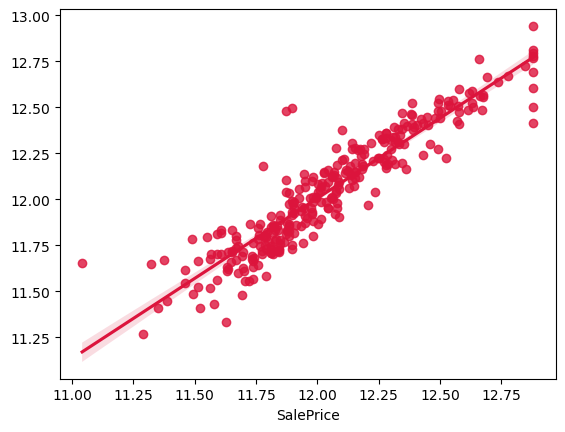

In [62]:
lr = LinearRegression()
BuiltModel(lr)

2. DecisionTreeRegressor Model:

MAE : 0.12468473971376158
RMSE : 0.17461498467201017
------------------------------
Training r2 Score : 100.0 % 

Testing r2 Score (Accuracy score): 74.39078409728421 %
------------------------------

Cross validation score : 69.18898152701652

Accuracy Score - Cross Validation Score : 5.201802570267688


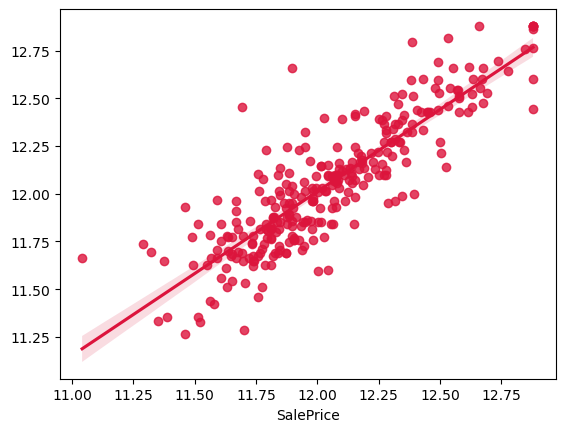

In [63]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
BuiltModel(dt)

3. RandomForestRegressor Model:

MAE : 0.0879857881157707
RMSE : 0.13038010262170974
------------------------------
Training r2 Score : 98.10465798315506 % 

Testing r2 Score (Accuracy score): 85.72237739346626 %
------------------------------

Cross validation score : 87.31414309988963

Accuracy Score - Cross Validation Score : -1.5917657064233737


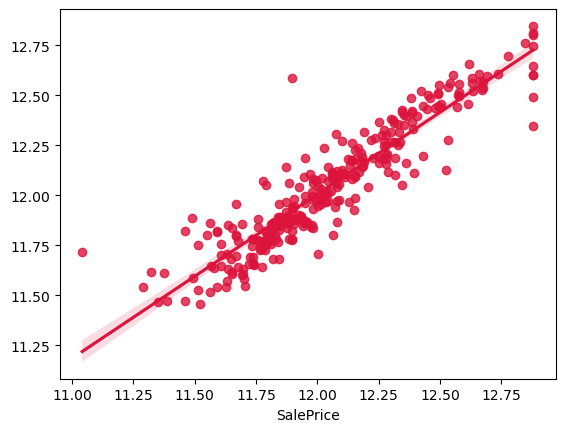

In [64]:
#model with RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
BuiltModel(rf)

4.XGBRegressor model:

In [66]:
!pip install xgboost

MAE : 0.0882521614752097
RMSE : 0.13025926509237606
------------------------------
Training r2 Score : 99.99904808583796 % 

Testing r2 Score (Accuracy score): 85.74883040441259 %
------------------------------

Cross validation score : 86.29721608058476

Accuracy Score - Cross Validation Score : -0.5483856761721739


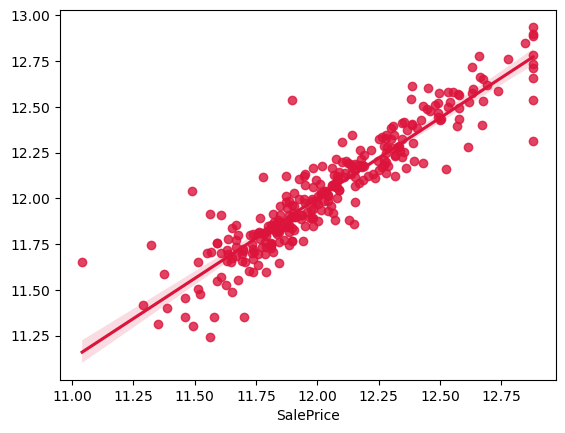

In [67]:
from xgboost import XGBRegressor
xgb = XGBRegressor(verbosity = 0)
BuiltModel(xgb)

5. ExtraTreesRegressor model:

MAE : 0.08956865785500935
RMSE : 0.12995552926008963
------------------------------
Training r2 Score : 100.0 % 

Testing r2 Score (Accuracy score): 85.8152140769483 %
------------------------------

Cross validation score : 86.61850633583408

Accuracy Score - Cross Validation Score : -0.80329225888579


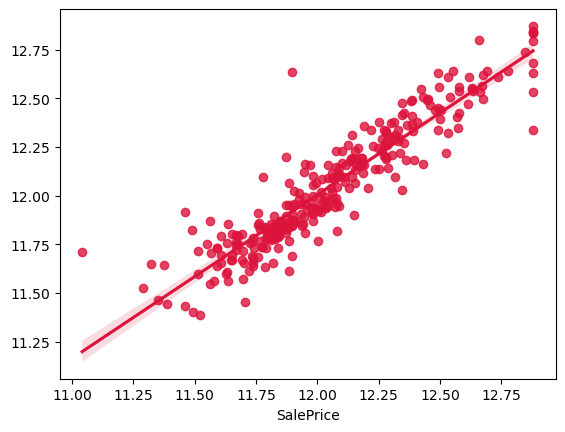

In [68]:
from sklearn.ensemble import ExtraTreesRegressor
ext = ExtraTreesRegressor()
BuiltModel(ext)

HyperParameter

In [72]:
from sklearn.model_selection import GridSearchCV
param_tuning = {
        'learning_rate': [0.1,1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [0.5,1, 3, 5],
        'subsample': [0.3,0.5 ,0.7],
        'colsample_bytree': [0.3,0.5, 0.7],
        'n_estimators' : [200, 500,],
        'objective': ['reg:squarederror']
    }

In [74]:
xgb_model = XGBRegressor()

gsearch = GridSearchCV(estimator = xgb_model, param_grid = param_tuning,cv = 5,n_jobs = -1,verbose = 1)

gsearch.fit(x_train,y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=N

In [75]:
gsearch.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 0.5,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

# final model

In [76]:
#lets train and test our final model with best parameters

model = XGBRegressor(
        objective = 'reg:squarederror',
        colsample_bytree = 0.3,
        learning_rate = 0.1,
        max_depth = 3,
        min_child_weight = 0.5,
        n_estimators = 500,
        subsample = 0.7)

model.fit(x_train,y_train)
pred = model.predict(x_test)

r2score = r2_score(y_test,pred)*100

#evaluation
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred)
print("MAE :", mae)
print("RMSE :", rmse)
print('------------------------------')

# r2 score

print(f" \nr2 Score:", r2score,"%")

MAE : 0.08013867576580883
RMSE : 0.11883219762596262
------------------------------
 
r2 Score: 88.13954039058464 %


our accuracy from 85.90% to 88.13% after Hyperparameter tuning

# Model Saving:

In [81]:
import joblib
joblib.dump(model,"House_price_prediction.pkl")

['House_price_prediction.pkl']